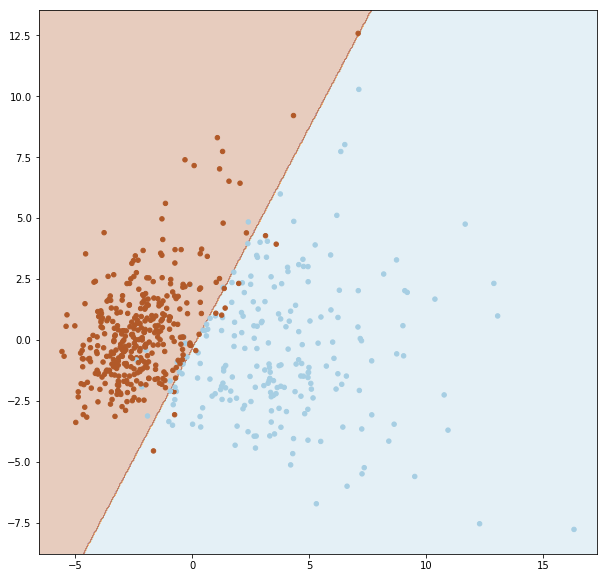

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load Breast Cancer dataset
cancer = load_breast_cancer()

# Transform to Panda data frame
data = np.c_[cancer.data, cancer.target]
df = pd.DataFrame(data, columns=np.append(cancer.feature_names, ["target"]))

# Separate target and features
X = df.drop('target', axis=1)
y = df.target

# Z-score normalization
X = StandardScaler().fit_transform(X)

# Reduce to 2D
pca = PCA(2).fit_transform(X)

# Logistic Regression: A linear classifier
classifier = LogisticRegression()

# Decision Tree: A rectangular classifier
# classifier = tree.DecisionTreeClassifier(max_depth=3)

# k-NN: A scattered classifier (observe effect of different k)
# classifier = KNeighborsClassifier(n_neighbors=3)

# Train classifier on complete dataset
classifier.fit(pca, y)

# Create mesh grid
x_min, x_max = pca[:, 0].min() - 1, pca[:, 0].max() + 1
y_min, y_max = pca[:, 1].min() - 1, pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

# Predict each mesh grid point with chosen classifier
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualization
plt.figure(figsize=(10,10))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(pca[:,0], pca[:,1], s=20, c=y, cmap=plt.cm.Paired)
plt.show()